# Xarray Fundamentals

## DataArray

In [2]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(8,5)

In [3]:
da=xr.DataArray([9,0,2,1,0])
da

<xarray.DataArray (dim_0: 5)>
array([9, 0, 2, 1, 0])
Dimensions without coordinates: dim_0

In [4]:
da=xr.DataArray([9,0,2,1,0],dims=['x']) #named dimension (each axis)
da

<xarray.DataArray (x: 5)>
array([9, 0, 2, 1, 0])
Dimensions without coordinates: x

In [5]:
da=xr.DataArray([9,0,2,1,0],
                dims=['x'],
                coords={'x':[10,20,30,40,50]}) #added coordinates (label for each pt in dimension)
da

<xarray.DataArray (x: 5)>
array([9, 0, 2, 1, 0])
Coordinates:
  * x        (x) int64 10 20 30 40 50

In [6]:
da.indexes

x: Int64Index([10, 20, 30, 40, 50], dtype='int64', name='x')

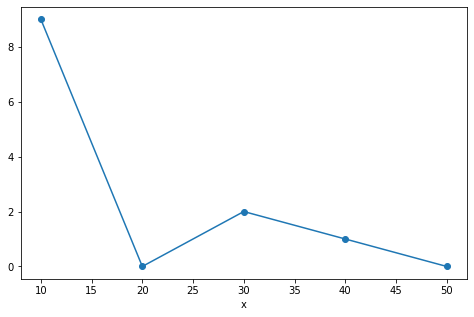

In [7]:
da.plot(marker='o') #note that x-axis is "coord" and y-axis is "dim"

## Multidimensional DataArray

In [8]:
conda install pooch --channel conda-forge

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.14.0
  latest version: 23.7.2

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pooch
url = "https://www.ldeo.columbia.edu/~rpa/float_data_4901412.zip"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash="2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009")
files.sort()
files

['/Users/Kaila/Library/Caches/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/P.npy',
 '/Users/Kaila/Library/Caches/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/S.npy',
 '/Users/Kaila/Library/Caches/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/T.npy',
 '/Users/Kaila/Library/Caches/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/date.npy',
 '/Users/Kaila/Library/Caches/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lat.npy',
 '/Users/Kaila/Library/Caches/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/levels.npy',
 '/Users/Kaila/Library/Caches/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lon.npy']

In [10]:
P=np.load(files[0]) #load variables into a NUMPY ARRAY
S=np.load(files[1])
T=np.load(files[2])
date=np.load(files[3])
lat=np.load(files[4])
levels=np.load(files[5])
lon=np.load(files[6])

In [11]:
da_salinity=xr.DataArray(S,dims=['level','date'],
                        coords={'level':levels,
                               'date':date},) #this is salinity at 78 levels across 75 dates
da_salinity

<xarray.DataArray (level: 78, date: 75)>
array([[35.6389389 , 35.51495743, 35.57297134, ..., 35.82093811,
        35.77793884, 35.66891098],
       [35.63393784, 35.5219574 , 35.57397079, ..., 35.81093216,
        35.58389664, 35.66791153],
       [35.6819458 , 35.52595901, 35.57297134, ..., 35.79592896,
        35.66290665, 35.66591263],
       ...,
       [34.91585922, 34.92390442, 34.92390442, ..., 34.93481064,
        34.94081116, 34.94680786],
       [34.91585922, 34.92390442, 34.92190552, ..., 34.93280792,
        34.93680954, 34.94380951],
       [34.91785812, 34.92390442, 34.92390442, ...,         nan,
        34.93680954,         nan]])
Coordinates:
  * level    (level) int64 0 1 2 3 4 5 6 7 8 9 ... 68 69 70 71 72 73 74 75 76 77
  * date     (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T...

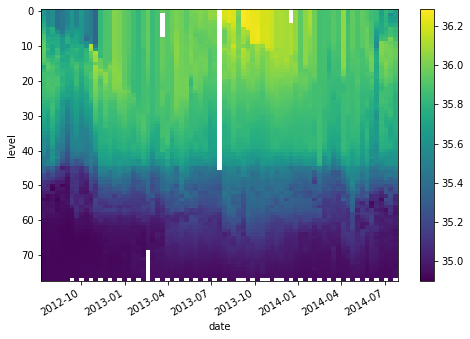

In [12]:
da_salinity.plot(yincrease=False) #plotted salnity at different levels across multiple times

In [13]:
da_salinity.attrs['units']='PSU' #not data but attributes/characteristics/extra info of the data
da_salinity.attrs['standard_name']='sea_water_salinity'
da_salinity

<xarray.DataArray (level: 78, date: 75)>
array([[35.6389389 , 35.51495743, 35.57297134, ..., 35.82093811,
        35.77793884, 35.66891098],
       [35.63393784, 35.5219574 , 35.57397079, ..., 35.81093216,
        35.58389664, 35.66791153],
       [35.6819458 , 35.52595901, 35.57297134, ..., 35.79592896,
        35.66290665, 35.66591263],
       ...,
       [34.91585922, 34.92390442, 34.92390442, ..., 34.93481064,
        34.94081116, 34.94680786],
       [34.91585922, 34.92390442, 34.92190552, ..., 34.93280792,
        34.93680954, 34.94380951],
       [34.91785812, 34.92390442, 34.92390442, ...,         nan,
        34.93680954,         nan]])
Coordinates:
  * level    (level) int64 0 1 2 3 4 5 6 7 8 9 ... 68 69 70 71 72 73 74 75 76 77
  * date     (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T...
Attributes:
    units:          PSU
    standard_name:  sea_water_salinity

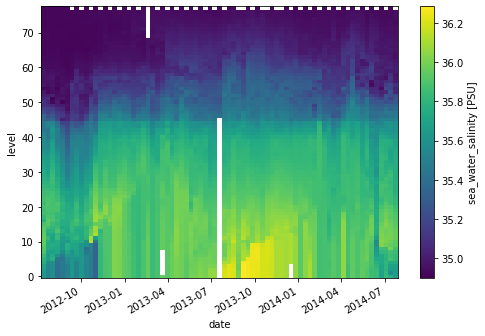

In [14]:
da_salinity.plot()

## Datasets

In [15]:
argo=xr.Dataset(
    data_vars={
        'salinity': (('level','date'),S),
        'temperature':(('level','date'),T),
        'pressure': (('level','date'),P)
    },
    coords={
        'level':levels,
        'date':date
    }
)

argo

<xarray.Dataset>
Dimensions:      (level: 78, date: 75)
Coordinates:
  * level        (level) int64 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
  * date         (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07...
Data variables:
    salinity     (level, date) float64 35.64 35.51 35.57 35.4 ... nan 34.94 nan
    temperature  (level, date) float64 18.97 18.44 19.1 19.79 ... nan 3.714 nan
    pressure     (level, date) float64 6.8 6.1 6.5 5.0 ... 2e+03 nan 2e+03 nan

 A dataset holds multiple variables that potentially share the same coordinates... in this case, (date,level) on the x-y axis
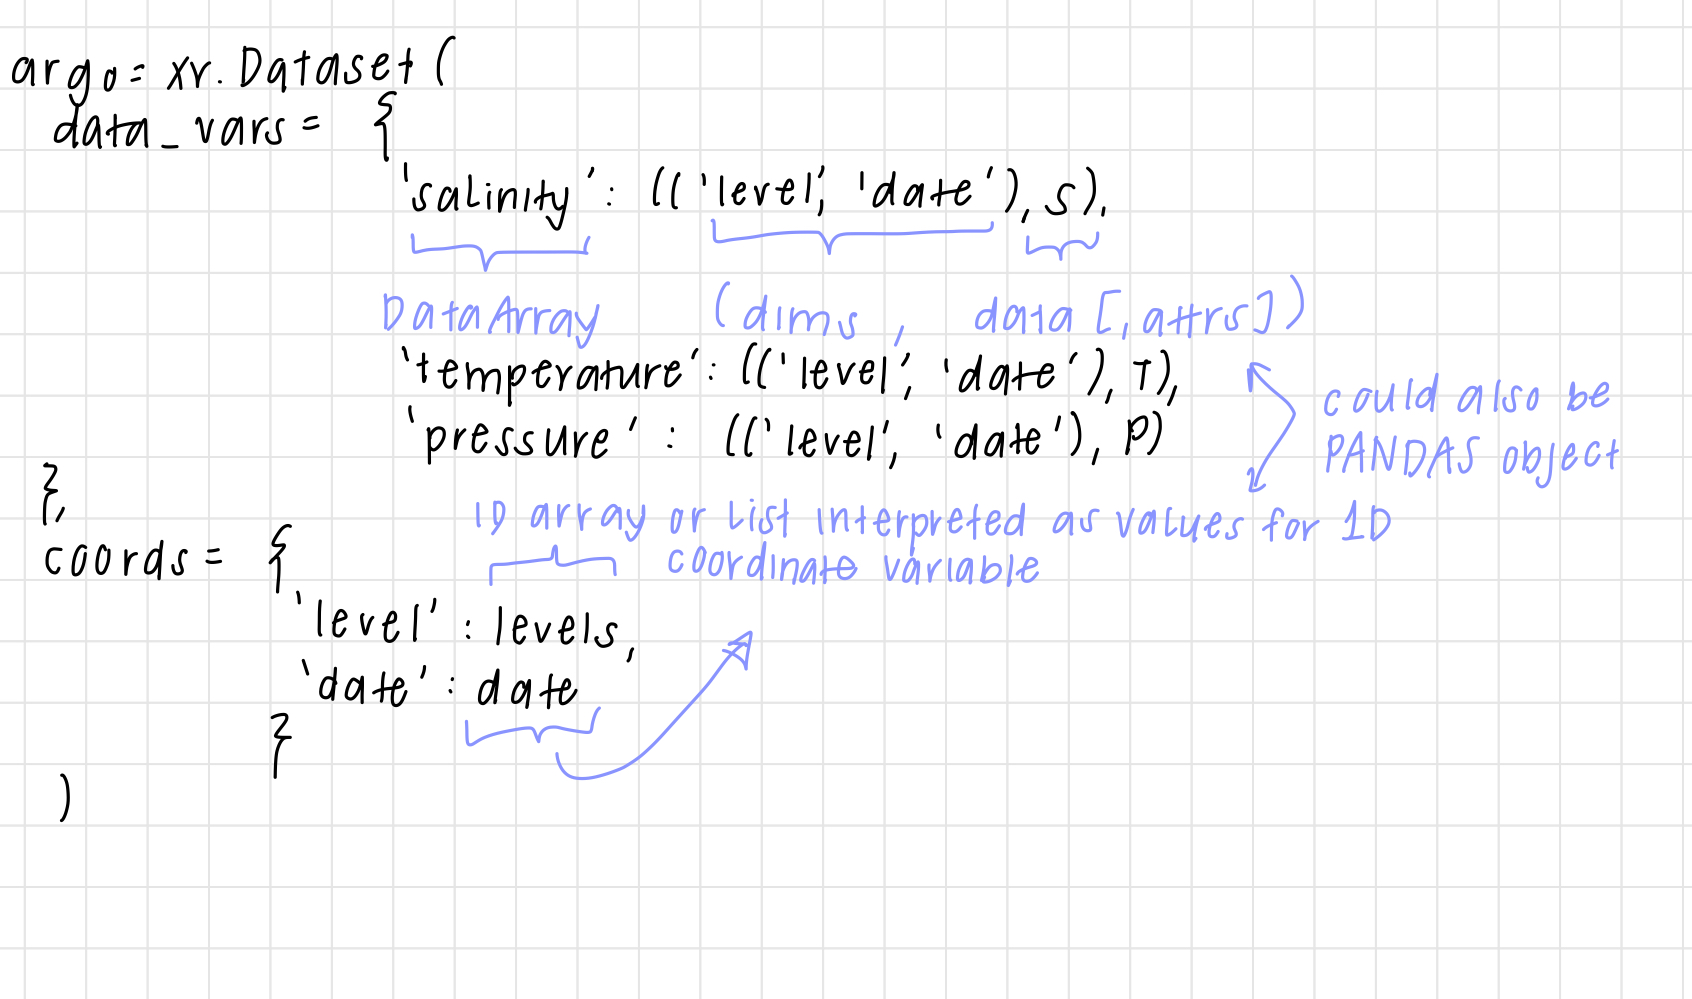

In [16]:
argo.coords['lon']=lon
argo

<xarray.Dataset>
Dimensions:      (level: 78, date: 75, lon: 75)
Coordinates:
  * level        (level) int64 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
  * date         (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07...
  * lon          (lon) float64 -39.13 -37.28 -36.9 ... -33.83 -34.11 -34.38
Data variables:
    salinity     (level, date) float64 35.64 35.51 35.57 35.4 ... nan 34.94 nan
    temperature  (level, date) float64 18.97 18.44 19.1 19.79 ... nan 3.714 nan
    pressure     (level, date) float64 6.8 6.1 6.5 5.0 ... 2e+03 nan 2e+03 nan

In [17]:
# BUT we want lon to have dimension of date so:
del argo['lon']
argo.coords['lon']=('date',lon)
argo.coords['lat']=('date',lat)
argo
# This allows us to have data at every level at every date AND at every latitude and longitude. 
# If we left it as before, we would have data variables based on level and date only.

<xarray.Dataset>
Dimensions:      (level: 78, date: 75)
Coordinates:
  * level        (level) int64 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
  * date         (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07...
    lon          (date) float64 -39.13 -37.28 -36.9 ... -33.83 -34.11 -34.38
    lat          (date) float64 47.19 46.72 46.45 46.23 ... 42.6 42.46 42.38
Data variables:
    salinity     (level, date) float64 35.64 35.51 35.57 35.4 ... nan 34.94 nan
    temperature  (level, date) float64 18.97 18.44 19.1 19.79 ... nan 3.714 nan
    pressure     (level, date) float64 6.8 6.1 6.5 5.0 ... 2e+03 nan 2e+03 nan

## Coordinatees vs Data Variables

DATA VARIABLES can be modified through arithmetic operations or other functions. COORDINATES are always kept the same

In [18]:
argo*10000

<xarray.Dataset>
Dimensions:      (level: 78, date: 75)
Coordinates:
  * level        (level) int64 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
  * date         (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07...
    lon          (date) float64 -39.13 -37.28 -36.9 ... -33.83 -34.11 -34.38
    lat          (date) float64 47.19 46.72 46.45 46.23 ... 42.6 42.46 42.38
Data variables:
    salinity     (level, date) float64 3.564e+05 3.551e+05 ... 3.494e+05 nan
    temperature  (level, date) float64 1.897e+05 1.844e+05 ... 3.714e+04 nan
    pressure     (level, date) float64 6.8e+04 6.1e+04 6.5e+04 ... nan 2e+07 nan

In [19]:
#lat & lon don't change when multiplying the dataset. Therefore we know they are coordinates. To change them to data variables:
argo=argo.set_coords(['lon','lat'])
argo

<xarray.Dataset>
Dimensions:      (level: 78, date: 75)
Coordinates:
  * level        (level) int64 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
  * date         (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07...
    lon          (date) float64 -39.13 -37.28 -36.9 ... -33.83 -34.11 -34.38
    lat          (date) float64 47.19 46.72 46.45 46.23 ... 42.6 42.46 42.38
Data variables:
    salinity     (level, date) float64 35.64 35.51 35.57 35.4 ... nan 34.94 nan
    temperature  (level, date) float64 18.97 18.44 19.1 19.79 ... nan 3.714 nan
    pressure     (level, date) float64 6.8 6.1 6.5 5.0 ... 2e+03 nan 2e+03 nan

Level & date are bolded because they represent the "dimension coordinates" (describes coordinates associated with data variable axes ==> describes the coordinates (in this case, level and date) associated with data variable axes (salinity, temp, or pressure). Lat & lon are non-dimension coordinates.

COORDINATE --> array that labels a dimension or set of dimensions of another DataArray

In [20]:
argo.coords['lon']=('date',lon) #assigns lat and lon directly to be coordinates
argo.coords['lat']=('date',lat)

## Selecting Data (Indexing)

Numpy indexing and slicing on DataArrays

In [21]:
argo.salinity[2] #only take the salinity at level 2. Then, the only dimension coordinate is date.

<xarray.DataArray 'salinity' (date: 75)>
array([35.6819458 , 35.52595901, 35.57297134, 35.40494537, 35.45091629,
       35.50192261, 35.62397766, 35.51696014, 35.62797546, 35.52292252,
       35.47383118, 35.33785629, 35.81896591, 35.88694   , 35.90187836,
       36.02391815, 36.00475693, 35.94187927, 35.91583252, 35.86392212,
       35.81995392, 35.88601303, 35.95079422, 35.84091568, 35.87992477,
               nan, 35.92179108, 35.96979141, 36.0008316 , 35.98083115,
       35.92887878, 35.98091888, 35.9838829 , 36.01884842, 35.99092484,
       36.04689026, 36.04185867,         nan, 36.19193268, 36.22789764,
       36.20986557, 35.97589874, 36.2779007 , 36.25889969, 36.2418251 ,
       36.23685837, 36.19781876, 36.19785309, 36.17692184, 36.1048851 ,
       36.11392212, 36.09080505,         nan, 36.05675888, 35.93374634,
       36.04291534, 36.10183716, 35.97779083, 35.86592102, 35.87791824,
       35.88392258, 35.92078781, 35.88601303, 36.05178833, 35.85883713,
       35.94878769, 35.8938446 , 35.94379425, 35.90884018, 35.84893036,
       35.83496857, 35.71691132, 35.79592896, 35.66290665, 35.66591263])
Coordinates:
    level    int64 2
  * date     (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T...
    lon      (date) float64 -39.13 -37.28 -36.9 -36.89 ... -33.83 -34.11 -34.38
    lat      (date) float64 47.19 46.72 46.45 46.23 ... 42.72 42.6 42.46 42.38

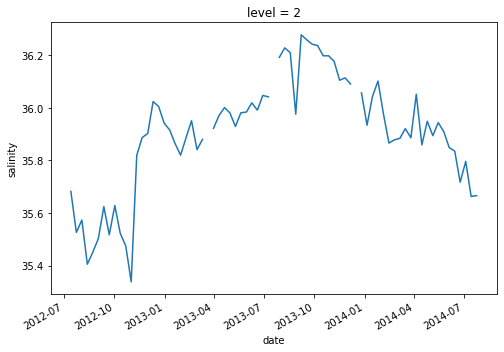

In [22]:
argo.salinity[2].plot()

In [23]:
argo.salinity[:,10] #salinity[level,date]. only take the salinity on the 10th date

<xarray.DataArray 'salinity' (level: 78)>
array([35.47483063, 35.47483063, 35.47383118, 35.47383118, 35.47383118,
       35.47483063, 35.48183441, 35.47983551, 35.4948349 , 35.51083755,
       36.13380051, 36.09579849, 35.95479965, 35.93979645, 35.8958931 ,
       35.86388397, 35.87788773, 35.88188934, 35.90379333, 35.9067955 ,
       35.86588669, 35.8588829 , 35.86088181, 35.85188293, 35.85788345,
       35.82787323, 35.78786469, 35.73185349, 35.69784927, 35.67684174,
       35.677845  , 35.65784073, 35.64083481, 35.6238327 , 35.59682846,
       35.57782364, 35.56182098, 35.55781937, 35.52181625, 35.49881363,
       35.51381302, 35.49981308, 35.47280884, 35.47880936, 35.44780731,
       35.39379501, 35.35879135, 35.28778076, 35.21878052, 35.20677567,
       35.17777252, 35.15076828, 35.07276535, 35.01475525, 34.9797554 ,
       35.0117569 , 35.03975677, 35.05575562, 35.00975037, 34.96175385,
       34.96775055, 34.95075226, 34.93775177, 34.93375015, 34.93775558,
       34.9247551 , 34.92175674, 34.91975403, 34.91975403, 34.91975403,
       34.92176056, 34.92375946, 34.92575836, 34.92575836, 34.92475891,
       34.93076324, 34.92176437,         nan])
Coordinates:
  * level    (level) int64 0 1 2 3 4 5 6 7 8 9 ... 68 69 70 71 72 73 74 75 76 77
    date     datetime64[ns] 2012-10-22T02:50:32.006400
    lon      float64 -32.97
    lat      float64 44.13

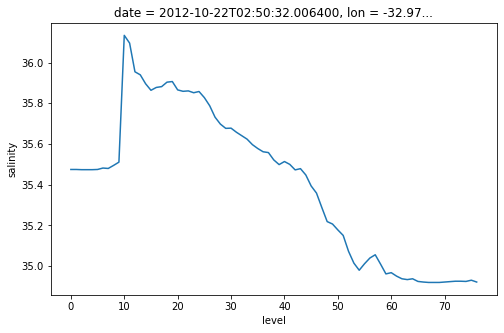

In [24]:
argo.salinity[:,10].plot()

xarray .sel() method for label-based indexing

In [25]:
argo.salinity.sel(level=2) #same idea as above: only take salinity from level 2

<xarray.DataArray 'salinity' (date: 75)>
array([35.6819458 , 35.52595901, 35.57297134, 35.40494537, 35.45091629,
       35.50192261, 35.62397766, 35.51696014, 35.62797546, 35.52292252,
       35.47383118, 35.33785629, 35.81896591, 35.88694   , 35.90187836,
       36.02391815, 36.00475693, 35.94187927, 35.91583252, 35.86392212,
       35.81995392, 35.88601303, 35.95079422, 35.84091568, 35.87992477,
               nan, 35.92179108, 35.96979141, 36.0008316 , 35.98083115,
       35.92887878, 35.98091888, 35.9838829 , 36.01884842, 35.99092484,
       36.04689026, 36.04185867,         nan, 36.19193268, 36.22789764,
       36.20986557, 35.97589874, 36.2779007 , 36.25889969, 36.2418251 ,
       36.23685837, 36.19781876, 36.19785309, 36.17692184, 36.1048851 ,
       36.11392212, 36.09080505,         nan, 36.05675888, 35.93374634,
       36.04291534, 36.10183716, 35.97779083, 35.86592102, 35.87791824,
       35.88392258, 35.92078781, 35.88601303, 36.05178833, 35.85883713,
       35.94878769, 35.8938446 , 35.94379425, 35.90884018, 35.84893036,
       35.83496857, 35.71691132, 35.79592896, 35.66290665, 35.66591263])
Coordinates:
    level    int64 2
  * date     (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T...
    lon      (date) float64 -39.13 -37.28 -36.9 -36.89 ... -33.83 -34.11 -34.38
    lat      (date) float64 47.19 46.72 46.45 46.23 ... 42.72 42.6 42.46 42.38

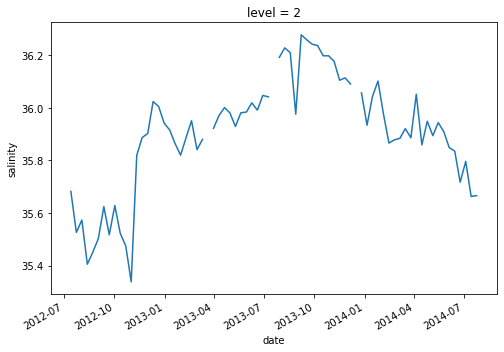

In [26]:
argo.salinity.sel(level=2).plot()

In [27]:
argo.salinity.sel(date='2012-10-22') #allowed to slice at the known data value

<xarray.DataArray 'salinity' (level: 78, date: 1)>
array([[35.47483063],
       [35.47483063],
       [35.47383118],
       [35.47383118],
       [35.47383118],
       [35.47483063],
       [35.48183441],
       [35.47983551],
       [35.4948349 ],
       [35.51083755],
       [36.13380051],
       [36.09579849],
       [35.95479965],
       [35.93979645],
       [35.8958931 ],
       [35.86388397],
       [35.87788773],
       [35.88188934],
       [35.90379333],
       [35.9067955 ],
...
       [35.00975037],
       [34.96175385],
       [34.96775055],
       [34.95075226],
       [34.93775177],
       [34.93375015],
       [34.93775558],
       [34.9247551 ],
       [34.92175674],
       [34.91975403],
       [34.91975403],
       [34.91975403],
       [34.92176056],
       [34.92375946],
       [34.92575836],
       [34.92575836],
       [34.92475891],
       [34.93076324],
       [34.92176437],
       [        nan]])
Coordinates:
  * level    (level) int64 0 1 2 3 4 5 6 7 8 9 ... 68 69 70 71 72 73 74 75 76 77
  * date     (date) datetime64[ns] 2012-10-22T02:50:32.006400
    lon      (date) float64 -32.97
    lat      (date) float64 44.13

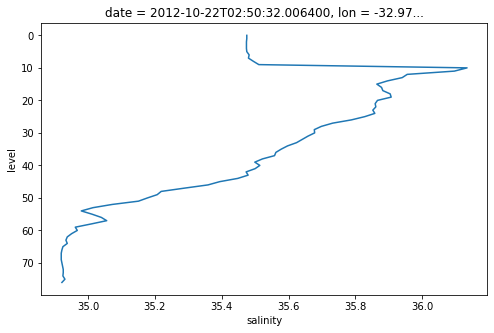

In [28]:
argo.salinity.sel(date='2012-10-22').plot(y='level',yincrease=False) #selecting is inclusive of parameters but slicing is not?

In [29]:
argo.salinity.sel(date=slice('2012-10-01','2012-12-01')) 

<xarray.DataArray 'salinity' (level: 78, date: 7)>
array([[35.63097763, 35.52592468, 35.47483063, 35.33785629, 35.81896591,
        35.8889389 , 35.90187836],
       [35.63097763, 35.52292252, 35.47483063, 35.33685684, 35.81796646,
        35.88793945, 35.90187836],
       [35.62797546, 35.52292252, 35.47383118, 35.33785629, 35.81896591,
        35.88694   , 35.90187836],
       [35.62697601, 35.52192307, 35.47383118, 35.33785629, 35.81896591,
        35.89193726, 35.90187836],
       [35.62797546, 35.52192307, 35.47383118, 35.33785629, 35.81996536,
        35.88993835, 35.90187836],
       [35.62897873, 35.52292252, 35.47483063, 35.33785629, 35.81996536,
        35.88993835, 35.90187836],
       [35.62997818, 35.51892471, 35.48183441, 35.33785629, 35.81996536,
        35.88993835, 35.90187836],
       [35.63197708, 35.44991302, 35.47983551, 35.33785629, 35.81996536,
        35.89683914, 35.90187836],
       [35.63097763, 35.38090134, 35.4948349 , 35.33785629, 35.81896591,
        35.89583969, 35.90187836],
       [35.62697601, 35.58792114, 35.51083755, 35.33985519, 35.82497025,
        35.89683914, 35.90187836],
...
       [34.91690445, 34.92385483, 34.91975403, 34.91980362, 34.92385483,
        34.93680573, 34.93885422],
       [34.92190552, 34.92485428, 34.91975403, 34.92080688, 34.92485428,
        34.94480515, 34.9328537 ],
       [34.92390442, 34.92285538, 34.92176056, 34.92280579, 34.92985535,
        34.93280411, 34.92785645],
       [34.92390442, 34.92385483, 34.92375946, 34.92480469, 34.92685318,
        34.93780899, 34.92485428],
       [34.92390442, 34.92285538, 34.92575836, 34.92181015, 34.92085648,
        34.93680954, 34.92385483],
       [34.92590332, 34.9288559 , 34.92575836, 34.92181015, 34.92685318,
        34.93481064, 34.92585373],
       [34.92490387, 34.92785645, 34.92475891, 34.92781067, 34.93385696,
        34.93380737, 34.92385864],
       [34.92190552, 34.92385864, 34.93076324, 34.9268074 , 34.93585968,
        34.93481064, 34.92985916],
       [34.92090607, 34.92185974, 34.92176437, 34.9228096 , 34.93285751,
        34.93180847, 34.92786026],
       [        nan, 34.91985703,         nan, 34.92181015,         nan,
        34.92181015,         nan]])
Coordinates:
  * level    (level) int64 0 1 2 3 4 5 6 7 8 9 ... 68 69 70 71 72 73 74 75 76 77
  * date     (date) datetime64[ns] 2012-10-02T03:00:17.971200 ... 2012-12-01T...
    lon      (date) float64 -34.46 -33.78 -32.97 -32.55 -32.43 -32.29 -32.17
    lat      (date) float64 44.96 44.68 44.13 43.64 43.07 42.66 42.51

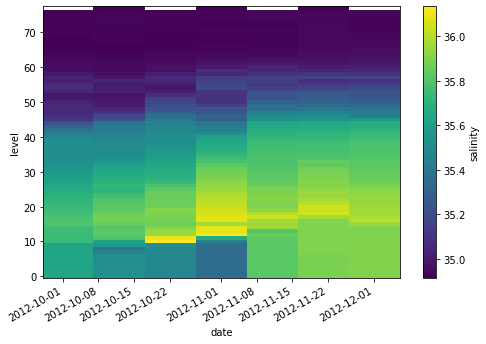

In [30]:
argo.salinity.sel(date=slice('2012-10-01', '2012-12-01')).plot() 
# WHY IS THERE SEL AND SLICE IN THIS COMMAND?

In [31]:
argo.sel(date='2012-10-22') #salinity data from the date 2012-10-22

<xarray.Dataset>
Dimensions:      (level: 78, date: 1)
Coordinates:
  * level        (level) int64 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
  * date         (date) datetime64[ns] 2012-10-22T02:50:32.006400
    lon          (date) float64 -32.97
    lat          (date) float64 44.13
Data variables:
    salinity     (level, date) float64 35.47 35.47 35.47 ... 34.93 34.92 nan
    temperature  (level, date) float64 17.13 17.13 17.13 ... 3.736 3.639 nan
    pressure     (level, date) float64 6.4 10.3 15.4 ... 1.9e+03 1.951e+03 nan

## Computation

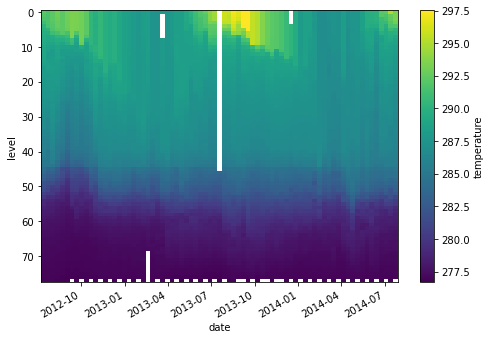

In [32]:
temp_kelvin=argo.temperature + 273.15
temp_kelvin.plot(yincrease=False)

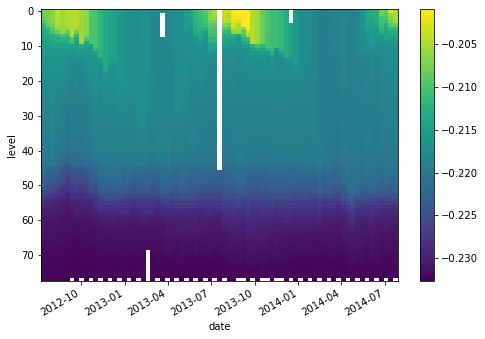

In [33]:
g=9.8
buoyancy=g*(2e-4 * argo.temperature - 7e-4 * argo.salinity)
buoyancy.plot(yincrease=False)

## Broadcasting, Alignment, and Combining Data
We broadcasst smaller arrays so that they are of equal size to larger arrays in order to make them compatible.

In [34]:
level_times_lat=argo.level * argo.lat
level_times_lat

<xarray.DataArray (level: 78, date: 75)>
array([[   0.   ,    0.   ,    0.   , ...,    0.   ,    0.   ,    0.   ],
       [  47.187,   46.716,   46.45 , ...,   42.601,   42.457,   42.379],
       [  94.374,   93.432,   92.9  , ...,   85.202,   84.914,   84.758],
       ...,
       [3539.025, 3503.7  , 3483.75 , ..., 3195.075, 3184.275, 3178.425],
       [3586.212, 3550.416, 3530.2  , ..., 3237.676, 3226.732, 3220.804],
       [3633.399, 3597.132, 3576.65 , ..., 3280.277, 3269.189, 3263.183]])
Coordinates:
  * level    (level) int64 0 1 2 3 4 5 6 7 8 9 ... 68 69 70 71 72 73 74 75 76 77
  * date     (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T...
    lon      (date) float64 -39.13 -37.28 -36.9 -36.89 ... -33.83 -34.11 -34.38
    lat      (date) float64 47.19 46.72 46.45 46.23 ... 42.72 42.6 42.46 42.38

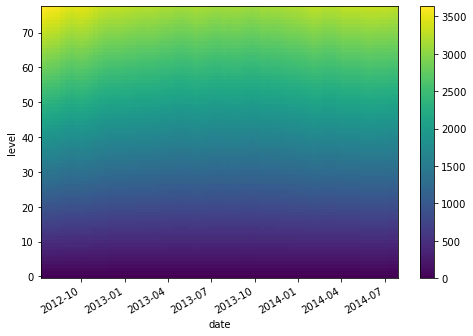

In [35]:
level_times_lat.plot()

## Alignment
If you try to perform operations on DataArrays that share a dimension name, Xarray will try to align them first

In [36]:
sa_surf=argo.salinity.isel(level=slice(0,20)) #we use isel because the resulting array will be indexed along the levels from 0 to 20
# we use sel when we already know the index labels along specified dimensions?
sa_mid=argo.salinity.isel(level=slice(10,30))

In [37]:
(sa_surf * sa_mid).level #multiply the corresponding levels together and it reindexes to start at 10?

<xarray.DataArray 'level' (level: 10)>
array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
Coordinates:
  * level    (level) int64 10 11 12 13 14 15 16 17 18 19

In [38]:
#we can override this by manually aligning the data
sa_surf_outer, sa_mid_outer = xr.align(sa_surf,sa_mid,join='outer')
sa_surf_outer.level

<xarray.DataArray 'level' (level: 30)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])
Coordinates:
  * level    (level) int64 0 1 2 3 4 5 6 7 8 9 ... 20 21 22 23 24 25 26 27 28 29

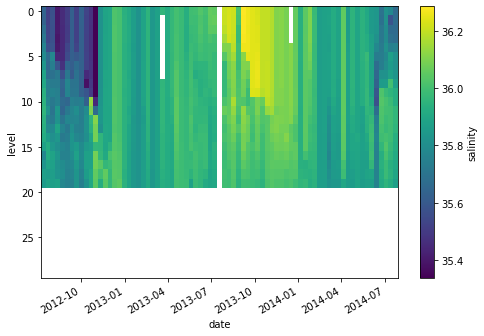

In [39]:
sa_surf_outer.plot(yincrease=False)

## Combining Data: Concat & Merge
XR.CONCAT --> concatenate multiple arrays into one bigger one along their dimensions
XR.MERGE --> combine multiple different arraysinto a dataset
** XARRAY won't check the values of coordinates before concat **

In [40]:
sa_surf_mid=xr.concat([sa_surf,sa_mid],dim='level') #rejoins the sa_surf and sa_mid data slices
sa_surf_mid

<xarray.DataArray 'salinity' (level: 40, date: 75)>
array([[35.6389389 , 35.51495743, 35.57297134, ..., 35.82093811,
        35.77793884, 35.66891098],
       [35.63393784, 35.5219574 , 35.57397079, ..., 35.81093216,
        35.58389664, 35.66791153],
       [35.6819458 , 35.52595901, 35.57297134, ..., 35.79592896,
        35.66290665, 35.66591263],
       ...,
       [35.78895187, 35.7829895 , 35.85100555, ..., 35.84291458,
        35.81891251, 35.7779007 ],
       [35.76794815, 35.75598526, 35.84500504, ..., 35.84891891,
        35.83391571, 35.76390076],
       [35.75194168, 35.71097565, 35.83100128, ..., 35.80690765,
        35.85292053, 35.75489807]])
Coordinates:
  * level    (level) int64 0 1 2 3 4 5 6 7 8 9 ... 20 21 22 23 24 25 26 27 28 29
  * date     (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T...
    lon      (date) float64 -39.13 -37.28 -36.9 -36.89 ... -33.83 -34.11 -34.38
    lat      (date) float64 47.19 46.72 46.45 46.23 ... 42.72 42.6 42.46 42.38

In [41]:
sa_surf_mid.level #shows us where the overlapping data occurs (11, 12, 13, etc)

<xarray.DataArray 'level' (level: 40)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 28, 29])
Coordinates:
  * level    (level) int64 0 1 2 3 4 5 6 7 8 9 ... 20 21 22 23 24 25 26 27 28 29

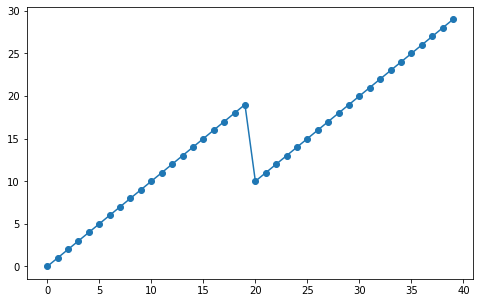

In [42]:
plt.plot(sa_surf_mid.level.values,marker='o')

In [43]:
#concat data along a new dimension
sa_concat_new=xr.concat([sa_surf,sa_mid],dim='newdim')
sa_concat_new

<xarray.DataArray 'salinity' (newdim: 2, level: 30, date: 75)>
array([[[35.6389389 , 35.51495743, 35.57297134, ..., 35.82093811,
         35.77793884, 35.66891098],
        [35.63393784, 35.5219574 , 35.57397079, ..., 35.81093216,
         35.58389664, 35.66791153],
        [35.6819458 , 35.52595901, 35.57297134, ..., 35.79592896,
         35.66290665, 35.66591263],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [35.78895187, 35.7829895 , 35.85100555, ..., 35.84291458,
         35.81891251, 35.7779007 ],
        [35.76794815, 35.75598526, 35.84500504, ..., 35.84891891,
         35.83391571, 35.76390076],
        [35.75194168, 35.71097565, 35.83100128, ..., 35.80690765,
         35.85292053, 35.75489807]]])
Coordinates:
  * level    (level) int64 0 1 2 3 4 5 6 7 8 9 ... 20 21 22 23 24 25 26 27 28 29
  * date     (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T...
    lon      (date) float64 -39.13 -37.28 -36.9 -36.89 ... -33.83 -34.11 -34.38
    lat      (date) float64 47.19 46.72 46.45 46.23 ... 42.72 42.6 42.46 42.38
Dimensions without coordinates: newdim

data aligned using an outer join along non-concat dimensions
Therefore, we know that this is an outer join because nans appear

In [44]:
#merge DataArray and Dataset
xr.merge([argo.salinity,argo.temperature])

<xarray.Dataset>
Dimensions:      (level: 78, date: 75)
Coordinates:
  * level        (level) int64 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
  * date         (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07...
    lon          (date) float64 -39.13 -37.28 -36.9 ... -33.83 -34.11 -34.38
    lat          (date) float64 47.19 46.72 46.45 46.23 ... 42.6 42.46 42.38
Data variables:
    salinity     (level, date) float64 35.64 35.51 35.57 35.4 ... nan 34.94 nan
    temperature  (level, date) float64 18.97 18.44 19.1 19.79 ... nan 3.714 nan

In [45]:
argo.temperature

<xarray.DataArray 'temperature' (level: 78, date: 75)>
array([[18.97400093, 18.43700027, 19.09900093, ..., 19.11300087,
        21.82299995, 20.13100052],
       [18.74099922, 18.39999962, 19.08200073, ..., 18.47200012,
        19.45999908, 20.125     ],
       [18.37000084, 18.37400055, 19.06500053, ..., 18.22999954,
        19.26199913, 20.07699966],
       ...,
       [ 3.79299998,  3.81399989,  3.80200005, ...,  3.80699992,
         3.81100011,  3.8599999 ],
       [ 3.76399994,  3.77800012,  3.75699997, ...,  3.75399995,
         3.74600005,  3.80599999],
       [ 3.74399996,  3.74600005,  3.7249999 , ...,         nan,
         3.71399999,         nan]])
Coordinates:
  * level    (level) int64 0 1 2 3 4 5 6 7 8 9 ... 68 69 70 71 72 73 74 75 76 77
  * date     (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T...
    lon      (date) float64 -39.13 -37.28 -36.9 -36.89 ... -33.83 -34.11 -34.38
    lat      (date) float64 47.19 46.72 46.45 46.23 ... 42.72 42.6 42.46 42.38

In [46]:
argo.salinity

<xarray.DataArray 'salinity' (level: 78, date: 75)>
array([[35.6389389 , 35.51495743, 35.57297134, ..., 35.82093811,
        35.77793884, 35.66891098],
       [35.63393784, 35.5219574 , 35.57397079, ..., 35.81093216,
        35.58389664, 35.66791153],
       [35.6819458 , 35.52595901, 35.57297134, ..., 35.79592896,
        35.66290665, 35.66591263],
       ...,
       [34.91585922, 34.92390442, 34.92390442, ..., 34.93481064,
        34.94081116, 34.94680786],
       [34.91585922, 34.92390442, 34.92190552, ..., 34.93280792,
        34.93680954, 34.94380951],
       [34.91785812, 34.92390442, 34.92390442, ...,         nan,
        34.93680954,         nan]])
Coordinates:
  * level    (level) int64 0 1 2 3 4 5 6 7 8 9 ... 68 69 70 71 72 73 74 75 76 77
  * date     (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T...
    lon      (date) float64 -39.13 -37.28 -36.9 -36.89 ... -33.83 -34.11 -34.38
    lat      (date) float64 47.19 46.72 46.45 46.23 ... 42.72 42.6 42.46 42.38

In [47]:
xr.merge([
    argo.salinity.sel(level=slice(0,30)),
    argo.temperature.sel(level=slice(30,None))
])
# we are going to combine the 2 DataArrays (salinity & temp). 
# Note that we are looking at salinity's first 30 levels
# BUT we are NOT looking at the first 30 levels of temperature.

<xarray.Dataset>
Dimensions:      (level: 78, date: 75)
Coordinates:
  * level        (level) int64 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
  * date         (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07...
    lon          (date) float64 -39.13 -37.28 -36.9 ... -33.83 -34.11 -34.38
    lat          (date) float64 47.19 46.72 46.45 46.23 ... 42.6 42.46 42.38
Data variables:
    salinity     (level, date) float64 35.64 35.51 35.57 35.4 ... nan nan nan
    temperature  (level, date) float64 nan nan nan nan ... 3.728 nan 3.714 nan

In [48]:
xr.merge([
    argo.salinity.sel(level=slice(0,30)),
    argo.temperature.sel(level=slice(30,None))
    ], join='left')

<xarray.Dataset>
Dimensions:      (level: 31, date: 75)
Coordinates:
  * level        (level) int64 0 1 2 3 4 5 6 7 8 ... 22 23 24 25 26 27 28 29 30
  * date         (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07...
    lon          (date) float64 -39.13 -37.28 -36.9 ... -33.83 -34.11 -34.38
    lat          (date) float64 47.19 46.72 46.45 46.23 ... 42.6 42.46 42.38
Data variables:
    salinity     (level, date) float64 35.64 35.51 35.57 ... 35.78 35.83 35.76
    temperature  (level, date) float64 nan nan nan nan ... 13.59 13.74 13.31

LEFT and RIGHT joins are a type of outer join (things that don't have a counterpart stay).
Left join --> preserves unmatched rows of left array and throws out the unmatched rows of the right array
Right join --> preserves unmatched rows of right array and throws out the unmatched rows of the left array

In [49]:
argo.temperature.sel(level=30)

<xarray.DataArray 'temperature' (date: 75)>
array([13.70600033, 13.44799995, 14.14000034, 13.48600006, 12.89500046,
       12.05200005, 12.61299992, 12.95100021, 12.48200035, 12.97500038,
       13.20600033, 14.34500027, 13.95800018, 14.31200027, 14.18200016,
       14.16499996, 14.31200027, 14.37699986, 14.14000034, 14.14099979,
       14.54800034, 14.80000019, 14.24800014, 14.15499973, 14.14599991,
       14.21399975, 14.14500046, 14.27700043, 14.53600025, 14.47599983,
       14.18500042, 13.90200043, 13.90999985, 13.77600002, 13.85599995,
       13.4090004 , 13.5       ,         nan, 13.78199959, 13.75300026,
       14.08300018, 13.85599995, 13.90699959, 13.97399998, 13.93400002,
       13.82600021, 13.81900024, 13.90999985, 13.97299957, 14.1260004 ,
       14.09300041, 14.0340004 , 13.99699974, 13.92599964, 13.9119997 ,
       13.87699986, 13.92000008, 13.96500015, 13.76099968, 13.45800018,
       13.22500038, 13.22700024, 13.15799999, 13.52400017, 13.48600006,
       13.47399998, 13.63599968, 13.2869997 , 13.2869997 , 13.26599979,
       12.64099979, 13.64299965, 13.58699989, 13.73700047, 13.31000042])
Coordinates:
    level    int64 30
  * date     (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T...
    lon      (date) float64 -39.13 -37.28 -36.9 -36.89 ... -33.83 -34.11 -34.38
    lat      (date) float64 47.19 46.72 46.45 46.23 ... 42.72 42.6 42.46 42.38

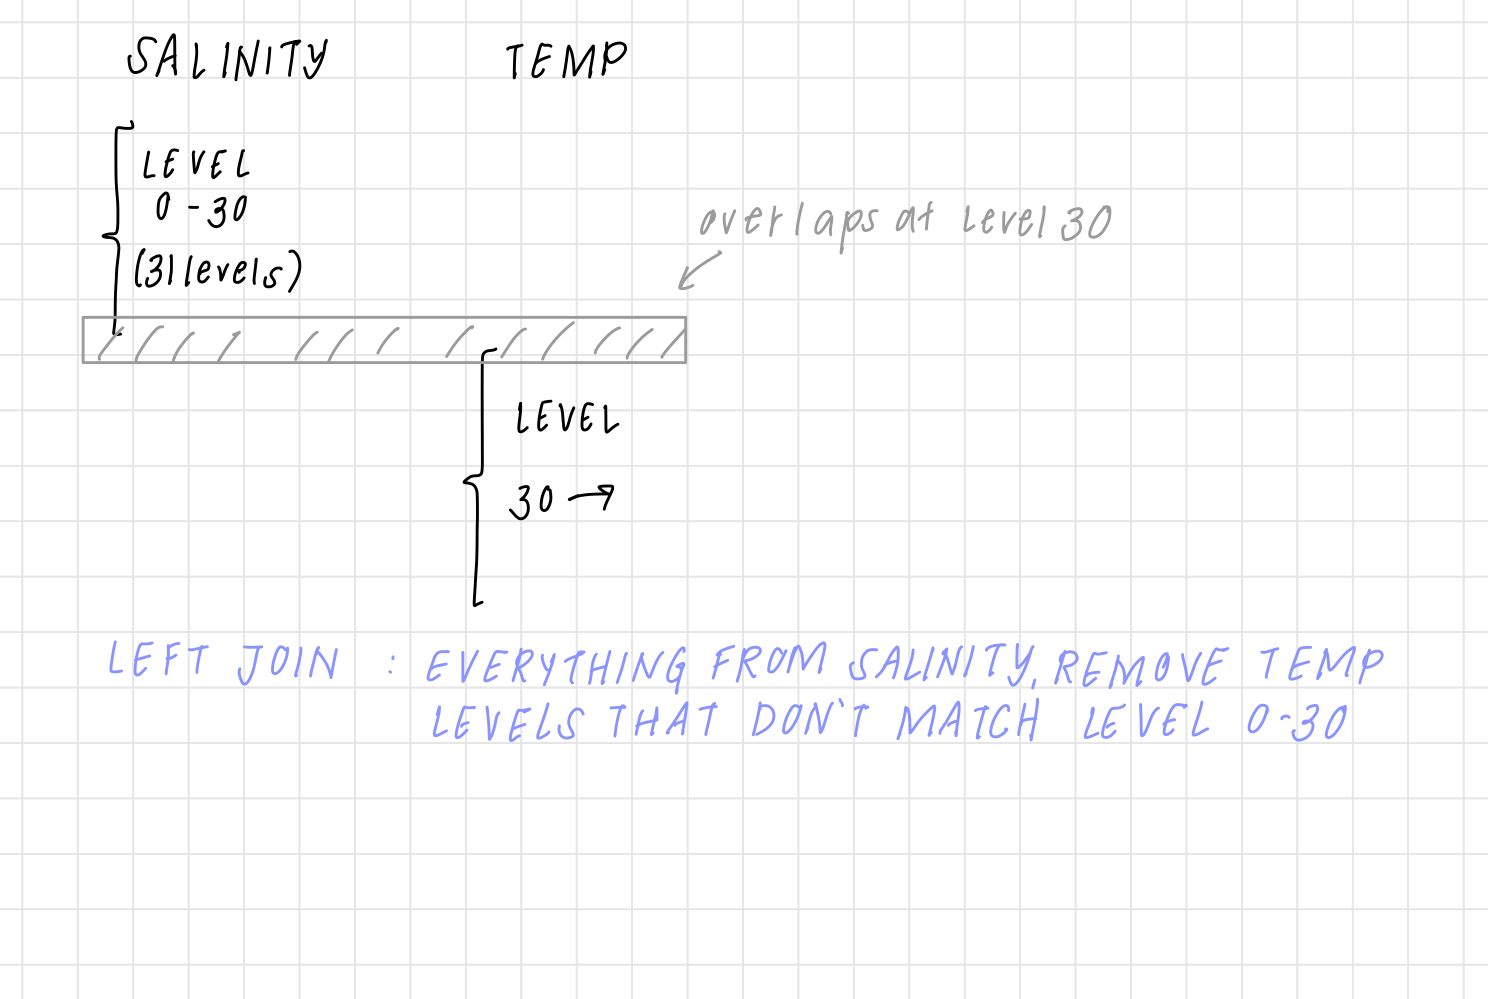

## Reductions
reduce xarray DataArrays along any number of axes

In [50]:
argo.temperature.mean(axis=0) #mean temperature every day (average across levels)

<xarray.DataArray 'temperature' (date: 75)>
array([10.88915385, 10.7282564 , 10.9336282 , 10.75679484, 10.38166666,
       10.08619236, 10.58194804, 10.50066671, 10.56841555, 10.53705122,
       10.81131168, 11.01932052, 11.39205196, 11.40823073, 11.3642208 ,
       11.35821797, 11.39444157, 11.10514098, 11.02870125, 10.80894868,
       10.93076625, 11.01069231, 11.88195654, 10.57373078, 10.66359736,
       10.56573237, 11.08854546, 10.87921792, 11.21384416, 11.24991028,
       11.29168825, 11.06203848, 11.32829864, 11.20401279, 11.25300001,
       11.32106403, 11.40112986,  6.07053117, 11.7748052 , 11.7466795 ,
       12.03732056, 11.92653251, 12.08844156, 12.20543591, 12.23402598,
       12.03365387, 11.9919221 , 11.92087012, 11.84273071, 11.79711684,
       11.7895325 , 11.55385894, 11.19083561, 11.266282  , 11.0611948 ,
       11.0307179 , 11.06566232, 10.79799995, 10.787     , 10.41173077,
       10.44170127, 10.32649998, 10.38242857, 10.88080769, 10.86177921,
       10.98787178, 10.93602596, 10.73039743, 11.09251948, 10.93983334,
       10.65942862, 11.01814097, 11.21918184, 11.19080765, 11.13364934])
Coordinates:
  * date     (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T...
    lon      (date) float64 -39.13 -37.28 -36.9 -36.89 ... -33.83 -34.11 -34.38
    lat      (date) float64 47.19 46.72 46.45 46.23 ... 42.72 42.6 42.46 42.38

In [51]:
argo.temperature.mean(axis=1) #mean temperature at every level (average across days)

<xarray.DataArray 'temperature' (level: 78)>
array([17.60172602, 17.57223609, 17.5145833 , 17.42326395, 17.24943838,
       17.03730134, 16.76787661, 16.44609588, 16.17439195, 16.04501356,
       15.65827023, 15.4607296 , 15.26114862, 15.12489191, 14.99133783,
       14.90160808, 14.81990544, 14.74535139, 14.66822971, 14.585027  ,
       14.49732434, 14.41904053, 14.35412163, 14.27102702, 14.19081082,
       14.11487838, 14.04347293, 13.98067566, 13.90994595, 13.83274319,
       13.76139196, 13.69836479, 13.62335132, 13.54185131, 13.46647295,
       13.39395946, 13.32541891, 13.25205403, 13.18131082, 13.10233782,
       12.89268916, 12.67795943, 12.4649189 , 12.2178513 , 11.98270268,
       11.1281081 , 10.80430666, 10.49702667, 10.1749066 ,  9.83453334,
        9.48625332,  9.19793334,  8.66010666,  8.12324001,  7.60221333,
        7.15289333,  6.74250667,  6.39543999,  6.04598667,  5.74538665,
        5.48913333,  5.26604001,  5.08768   ,  4.93479998,  4.77769334,
        4.65368   ,  4.54237334,  4.44274664,  4.35933333,  4.2653784 ,
        4.17290539,  4.08902703,  3.99864865,  3.92163514,  3.85617567,
        3.78916217,  3.72950001,  3.66207691])
Coordinates:
  * level    (level) int64 0 1 2 3 4 5 6 7 8 9 ... 68 69 70 71 72 73 74 75 76 77

In [52]:
argo_mean=argo.mean(dim='date') #performing a reduction on a dimension, rather than an axis
argo_mean
#mean temperature of every level (average across days)... we see this in the below plot (y-axis is level)

<xarray.Dataset>
Dimensions:      (level: 78)
Coordinates:
  * level        (level) int64 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
Data variables:
    salinity     (level) float64 35.91 35.9 35.9 35.9 ... 34.94 34.94 34.93
    temperature  (level) float64 17.6 17.57 17.51 17.42 ... 3.789 3.73 3.662
    pressure     (level) float64 6.435 10.57 15.54 ... 1.95e+03 1.999e+03

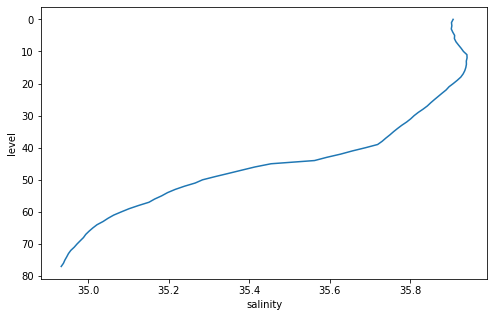

In [53]:
argo_mean.salinity.plot(y='level',yincrease=False)

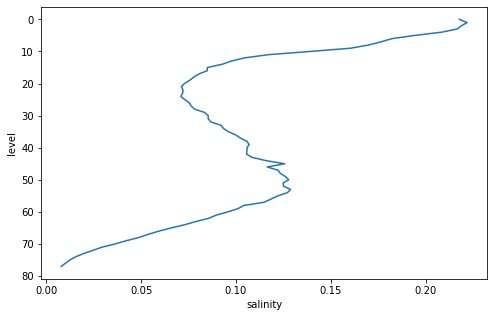

In [54]:
argo_std=argo.std(dim='date') #standard dev of every level (average across days)
argo_std.salinity.plot(y='level',yincrease=False)

## Weighted Reductions
performing a reduction but assign different weight factors to each point in the array.

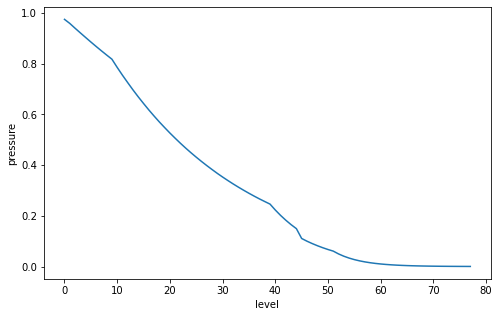

In [57]:
#eg weight values in upper ocean more than lower ocean. So we can create a weight array exponentially proportional to pressure:
mean_pressure=argo.pressure.mean(dim='date') #mean pressure of every level (average across days)
p0=250 #dbat
weights = np.exp(-mean_pressure / p0) # 1/(e^(mean_pressure/p0)... so as mean pressure increases, weights decreases exponentially
weights.plot()

In [59]:
temp_weighted_mean=argo.temperature.weighted(weights).mean('level') #weighted mean over level dimensions

\begin{equation}
   \underbrace{argo.temperature.weighted}_{associate\text{ }data\text{ }with\text{ }weights}\;\underbrace{(weights)}_{array\text{ }of\text{ }corresponding\text{ }weights}\;\;\underbrace{.mean('level')}_{take\text{ }weighted\text{ }mean\text{ }across\text{ }levels}
\end{equation}

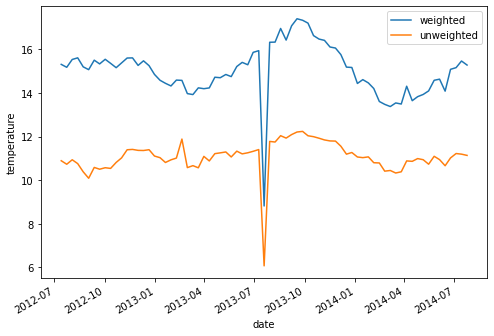

In [61]:
#compare to unweighted mean
temp_weighted_mean.plot(label='weighted')
argo.temperature.mean(dim='level').plot(label='unweighted')
plt.legend()
#note the more pronounced peaks and valleys

## Loading Data from netCDF Files
(Network Common Data Format)

In [69]:
ds=xr.open_dataset("gistemp_file.nc.gz")
ds

<xarray.Dataset>
Dimensions:      (lat: 90, lon: 180, time: 1722, nv: 2)
Coordinates:
  * lat          (lat) float32 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon          (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2023-06-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] ...
    tempanomaly  (time, lat, lon) float32 ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2023-07-11 10:35:53 by SBBX_to_nc 2.0 - ILAND=1200,...

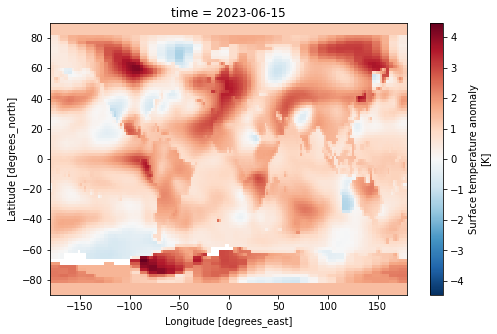

In [70]:
ds.tempanomaly.isel(time=-1).plot() #not too sure why we use isel works but sel doesn't

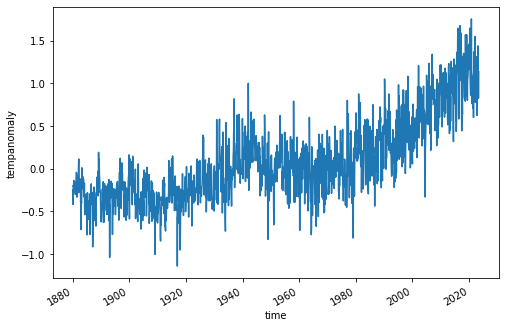

In [72]:
ds.tempanomaly.mean(dim=('lon','lat')).plot() 
# plot the mean temperature anomaly across every point. 
# So we would get the mean temperature anomaly of the entire world at each time